In [1]:
library(dplyr)
library(ggplot2)
# set the pZlot sizes to be full width
library(repr)
# Change plot size to BIG
options(repr.plot.width=20, repr.plot.height=10)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# df <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/nmu_experimental.csv")
df <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/nmu_experimental_fc.csv")
head(df)

,SH.SH,TS.SH,A1.SH,A2.SH,SH.B1,SH.B2,A1.B1,A1.B2,A2.B1,A2.B2,SH.SH16,TS.SH16,WT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.882,0.751,0.028,0.537,1.027,0.954,0.019,0.029,0.831,1.025,0.894,0.594,0.858
2,1.019,1.052,0.025,0.811,1.062,0.753,0.024,0.039,0.961,1.025,1.077,0.749,0.895
3,1.112,0.907,0.026,0.549,1.410,0.952,0.026,0.044,1.013,1.155,0.850,0.804,0.704


In [8]:
df <- df %>% select(-c(`SH.SH16`, `TS.SH16`))

In [9]:
df <- data.frame(t(df))
colnames(df) <- paste0("Sample", c(1:3))
df$vector <- rownames(df)

In [10]:
head(df)

,Sample1,Sample2,Sample3,vector
,<dbl>,<dbl>,<dbl>,<chr>
SH.SH,0.882,1.019,1.112,SH.SH
TS.SH,0.751,1.052,0.907,TS.SH
A1.SH,0.028,0.025,0.026,A1.SH
A2.SH,0.537,0.811,0.549,A2.SH
SH.B1,1.027,1.062,1.410,SH.B1
SH.B2,0.954,0.753,0.952,SH.B2


In [11]:
df$mean <- apply(df[,1:3], 1, mean)

In [12]:
plotdf <- df %>% tidyr::pivot_longer(!vector, names_to = "sample",values_to = "FC")
head(plotdf)

vector,sample,FC
<chr>,<chr>,<dbl>
SH.SH,Sample1,0.882000
SH.SH,Sample2,1.019000
SH.SH,Sample3,1.112000
SH.SH,mean,1.004333
TS.SH,Sample1,0.751000
TS.SH,Sample2,1.052000


Warning message:
“Ignoring unknown aesthetics: yintercept”


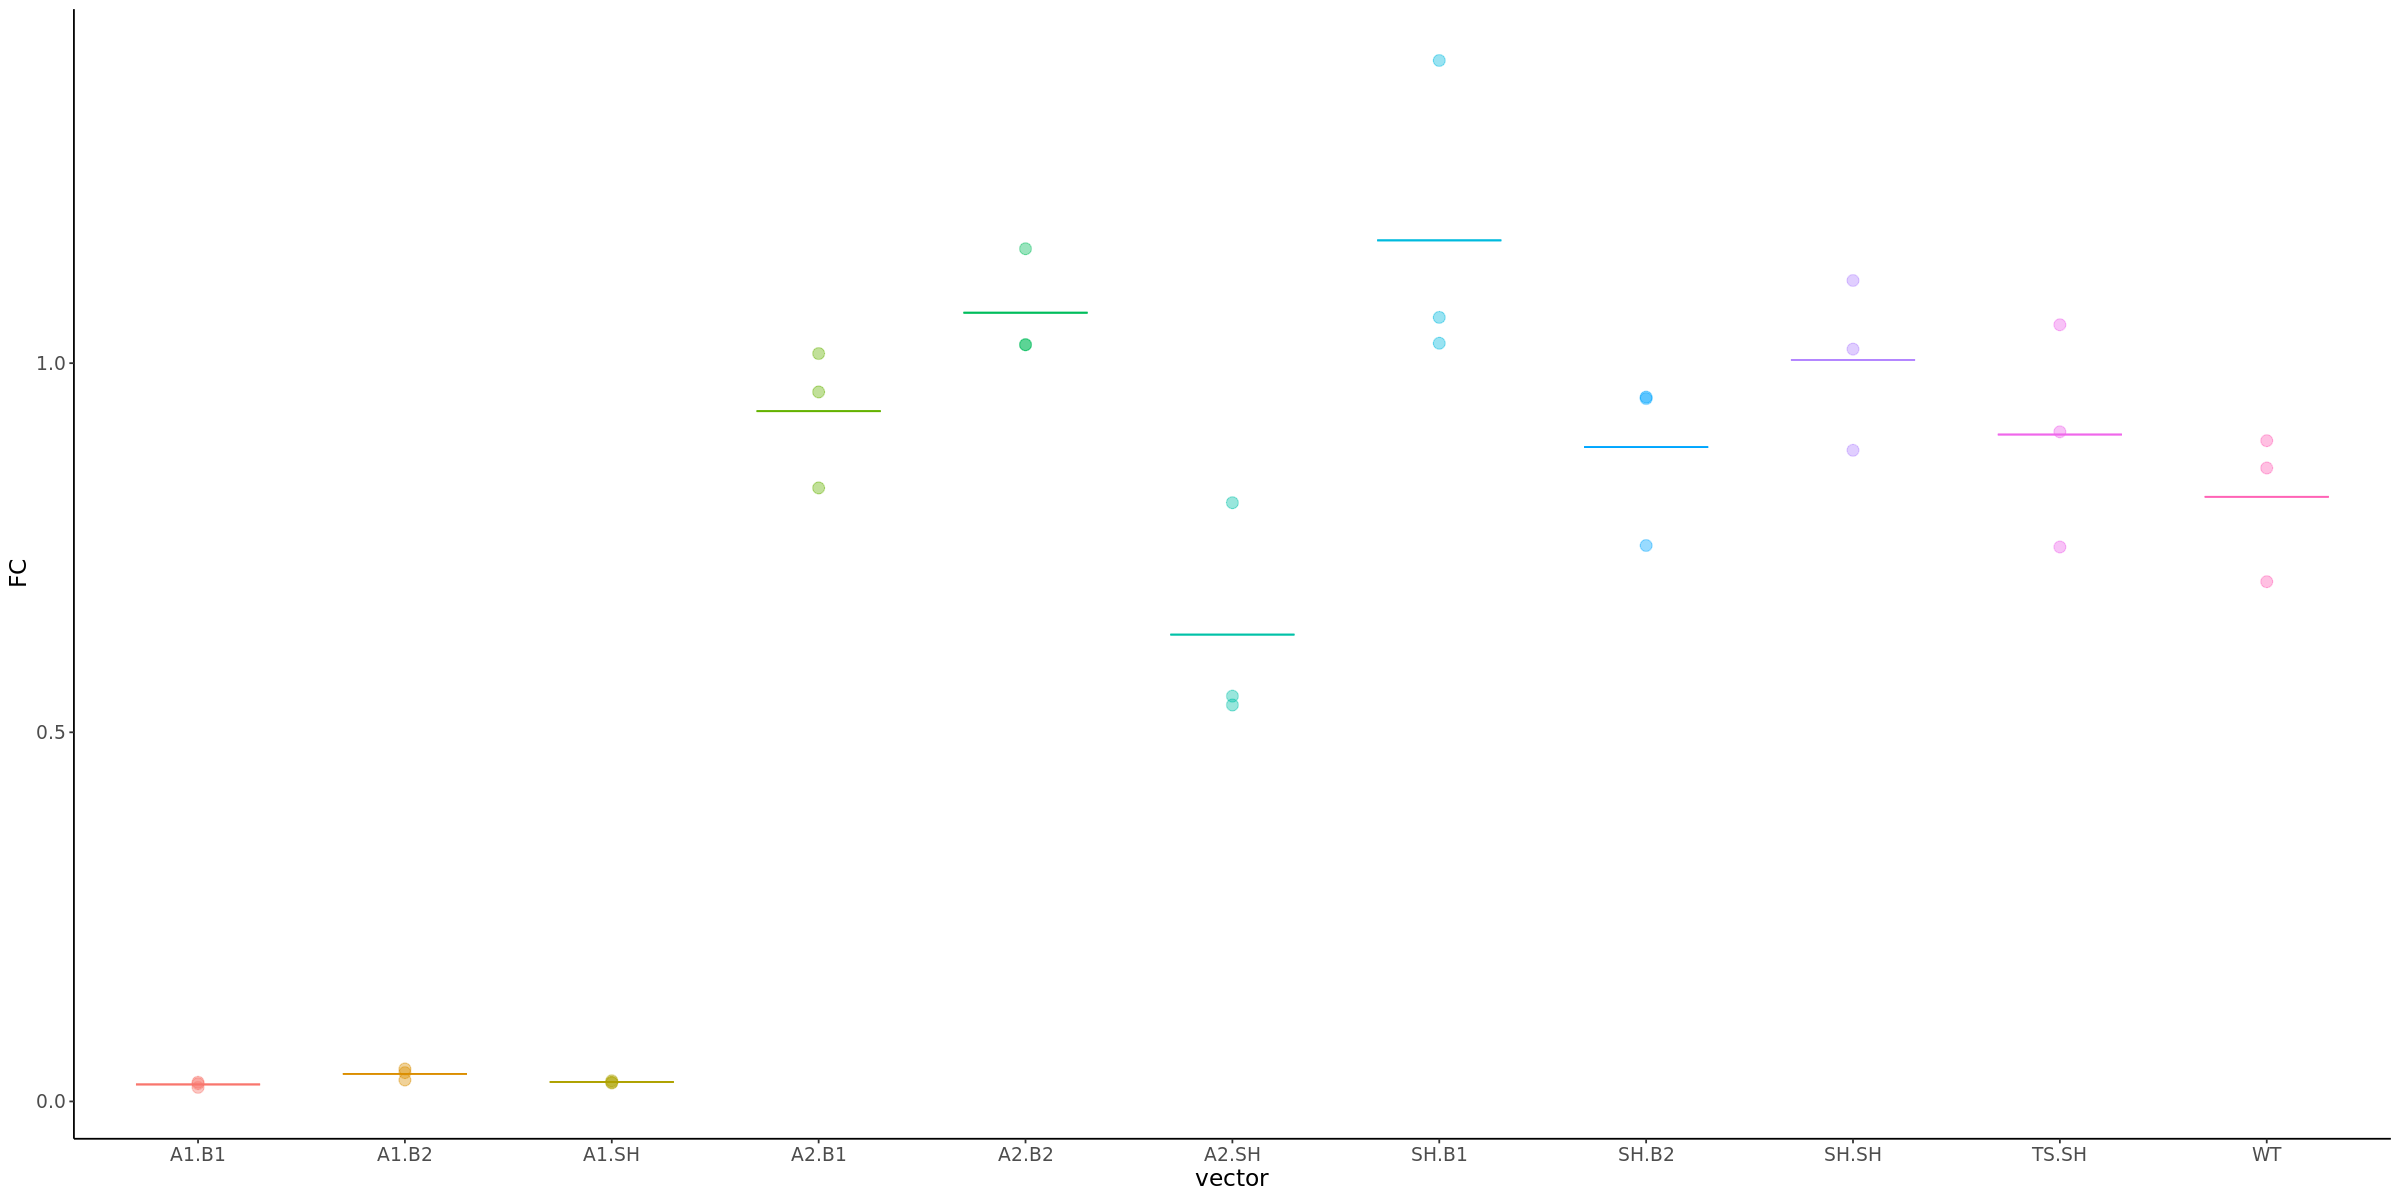

In [13]:
# group.colors <- c(`A1.` = "#DABFFF", `10` = "#907AD6", `100` ="#4F518C", `true` = "#F0EC57")

my_comparisons <- list(c("A1.B1", "A2.B1"), c("A1.B2", "A2.B2"), c("A1.SH", "A2.SH"))


ggplot(plotdf %>% filter(sample != "mean"), 
       aes(x = vector, y = FC,
          color = vector)) + 
                 geom_point(size = 3, alpha = 0.4) +
                theme_classic() + 
            theme(text = element_text(size = 14),
                 legend.position = "none") +
            geom_errorbar(stat = "summary", fun = "mean",
                  width=0.6,aes(ymax=..y..,ymin=..y.., yintercept = FC))
# geom_hline(data=  plotdf%>% filter(sample == "mean"), 
#            aes(yintercept = FC, col=vector)) +
# facet_grid(~vector, scales="free_x")

# ggboxplot(plotdf %>% filter(sample != "mean"),
#          x = "vector", y = "FC",
#          color = "vector", add = "dotplot") +
# stat_compare_means(comparisons = my_comparisons,
#                   method = "kruskal.test") + theme(legend.position = "none")

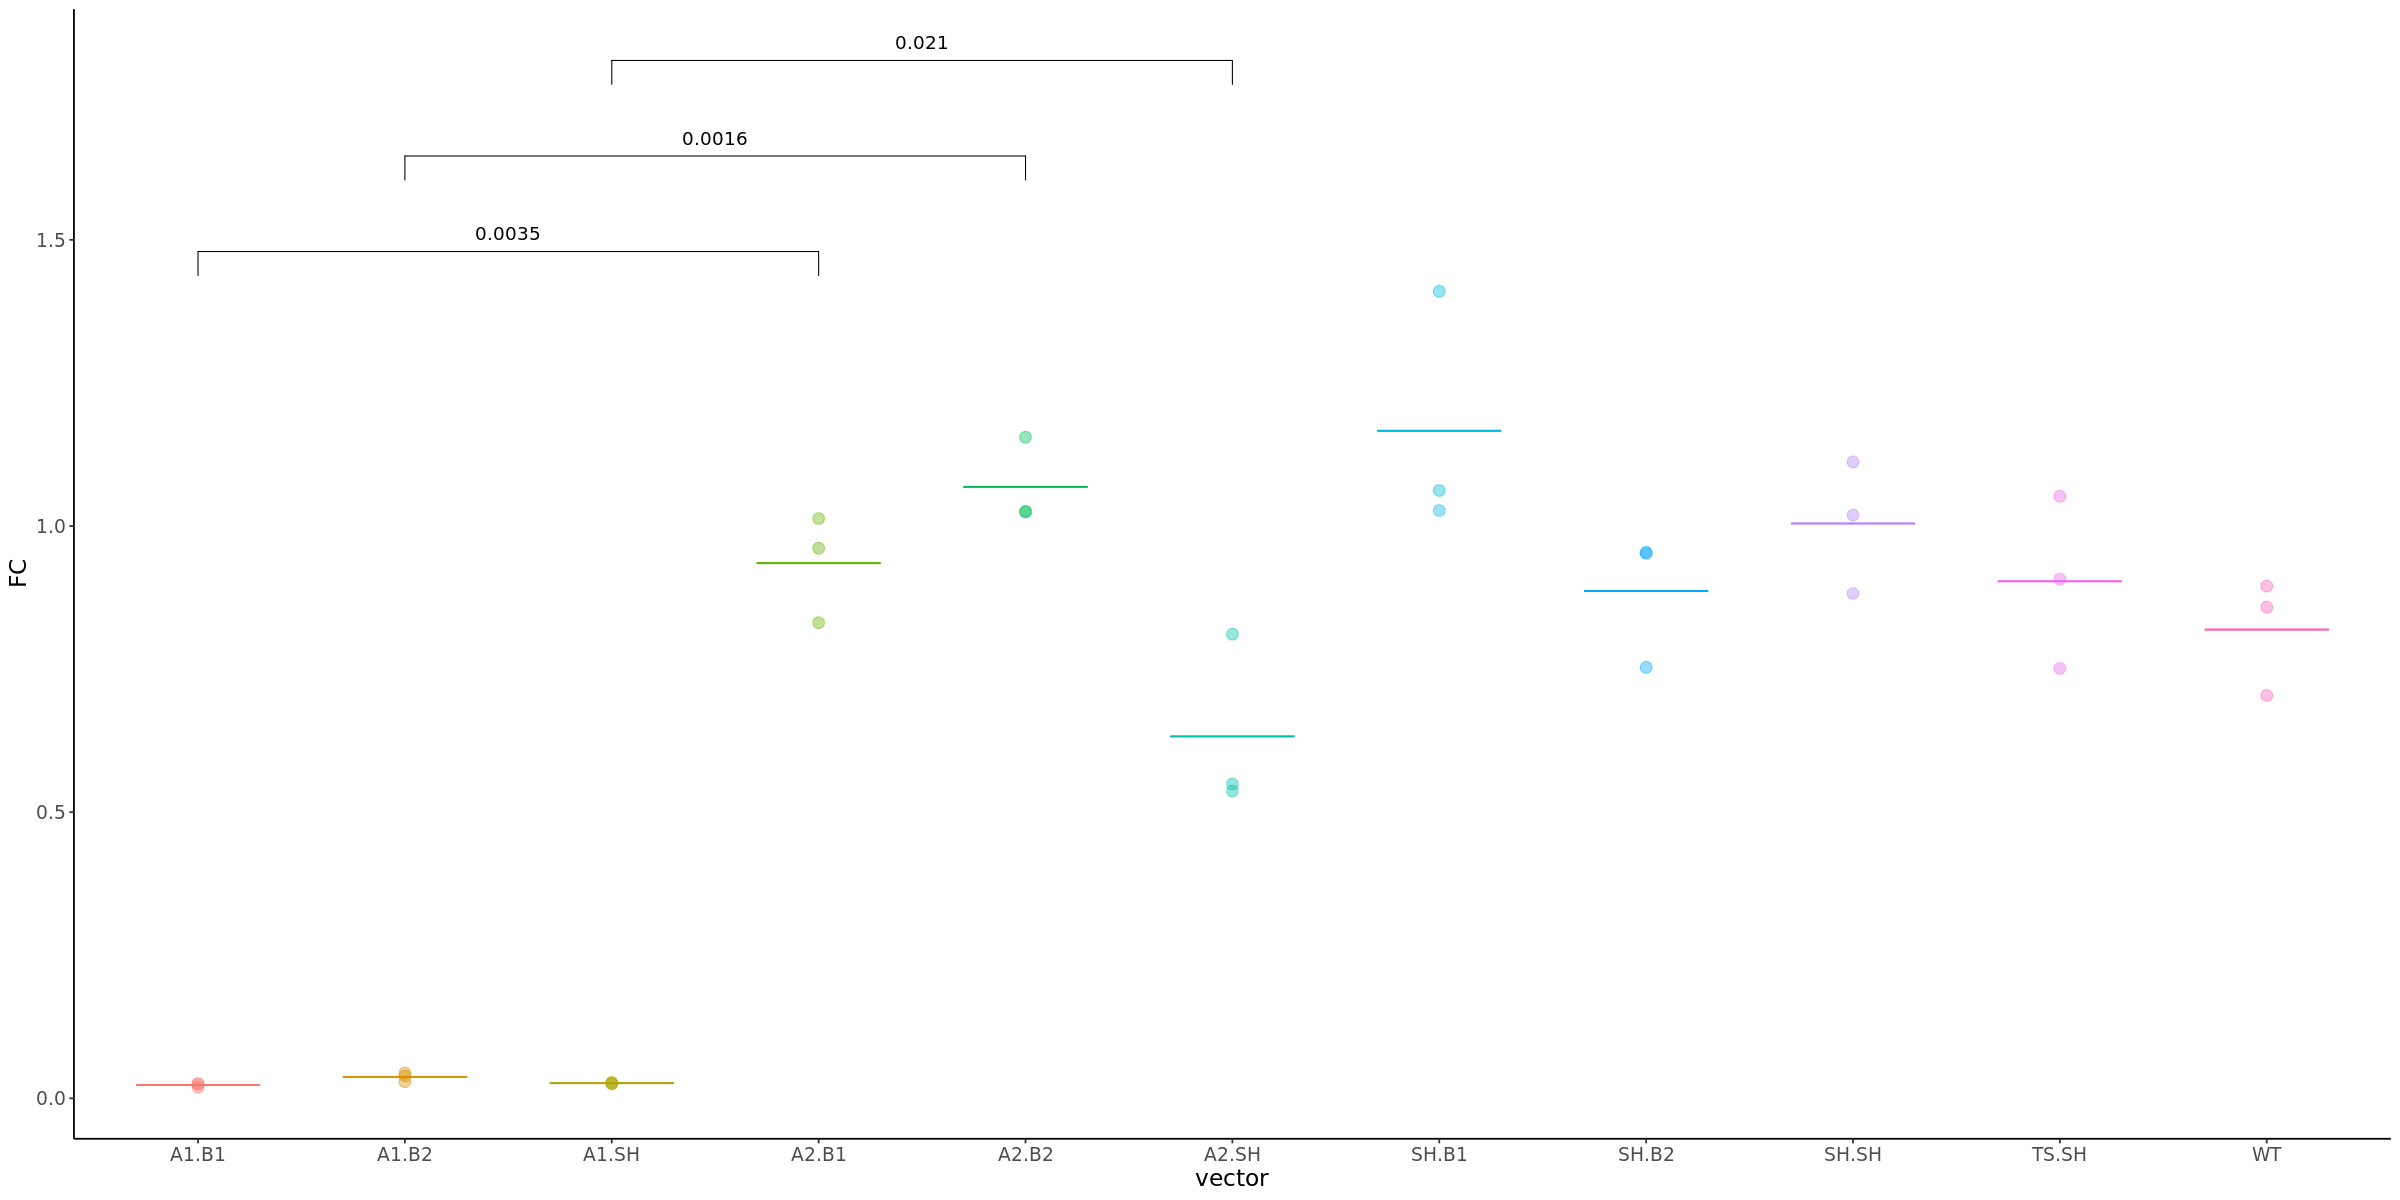

In [14]:
ggplot(plotdf %>% filter(sample != "mean"), 
       aes(x = vector, y = FC,
          color = vector)) + 
                 geom_point(size = 3, alpha = 0.4) +
                theme_classic() + 
            theme(text = element_text(size = 14),
                 legend.position = "none") +
            geom_errorbar(stat = "summary", fun = "mean",
                  width=0.6,aes(ymax=..y..,ymin=..y..)) +
stat_compare_means(comparisons = my_comparisons,
                  method = "t.test") + theme(legend.position = "none")

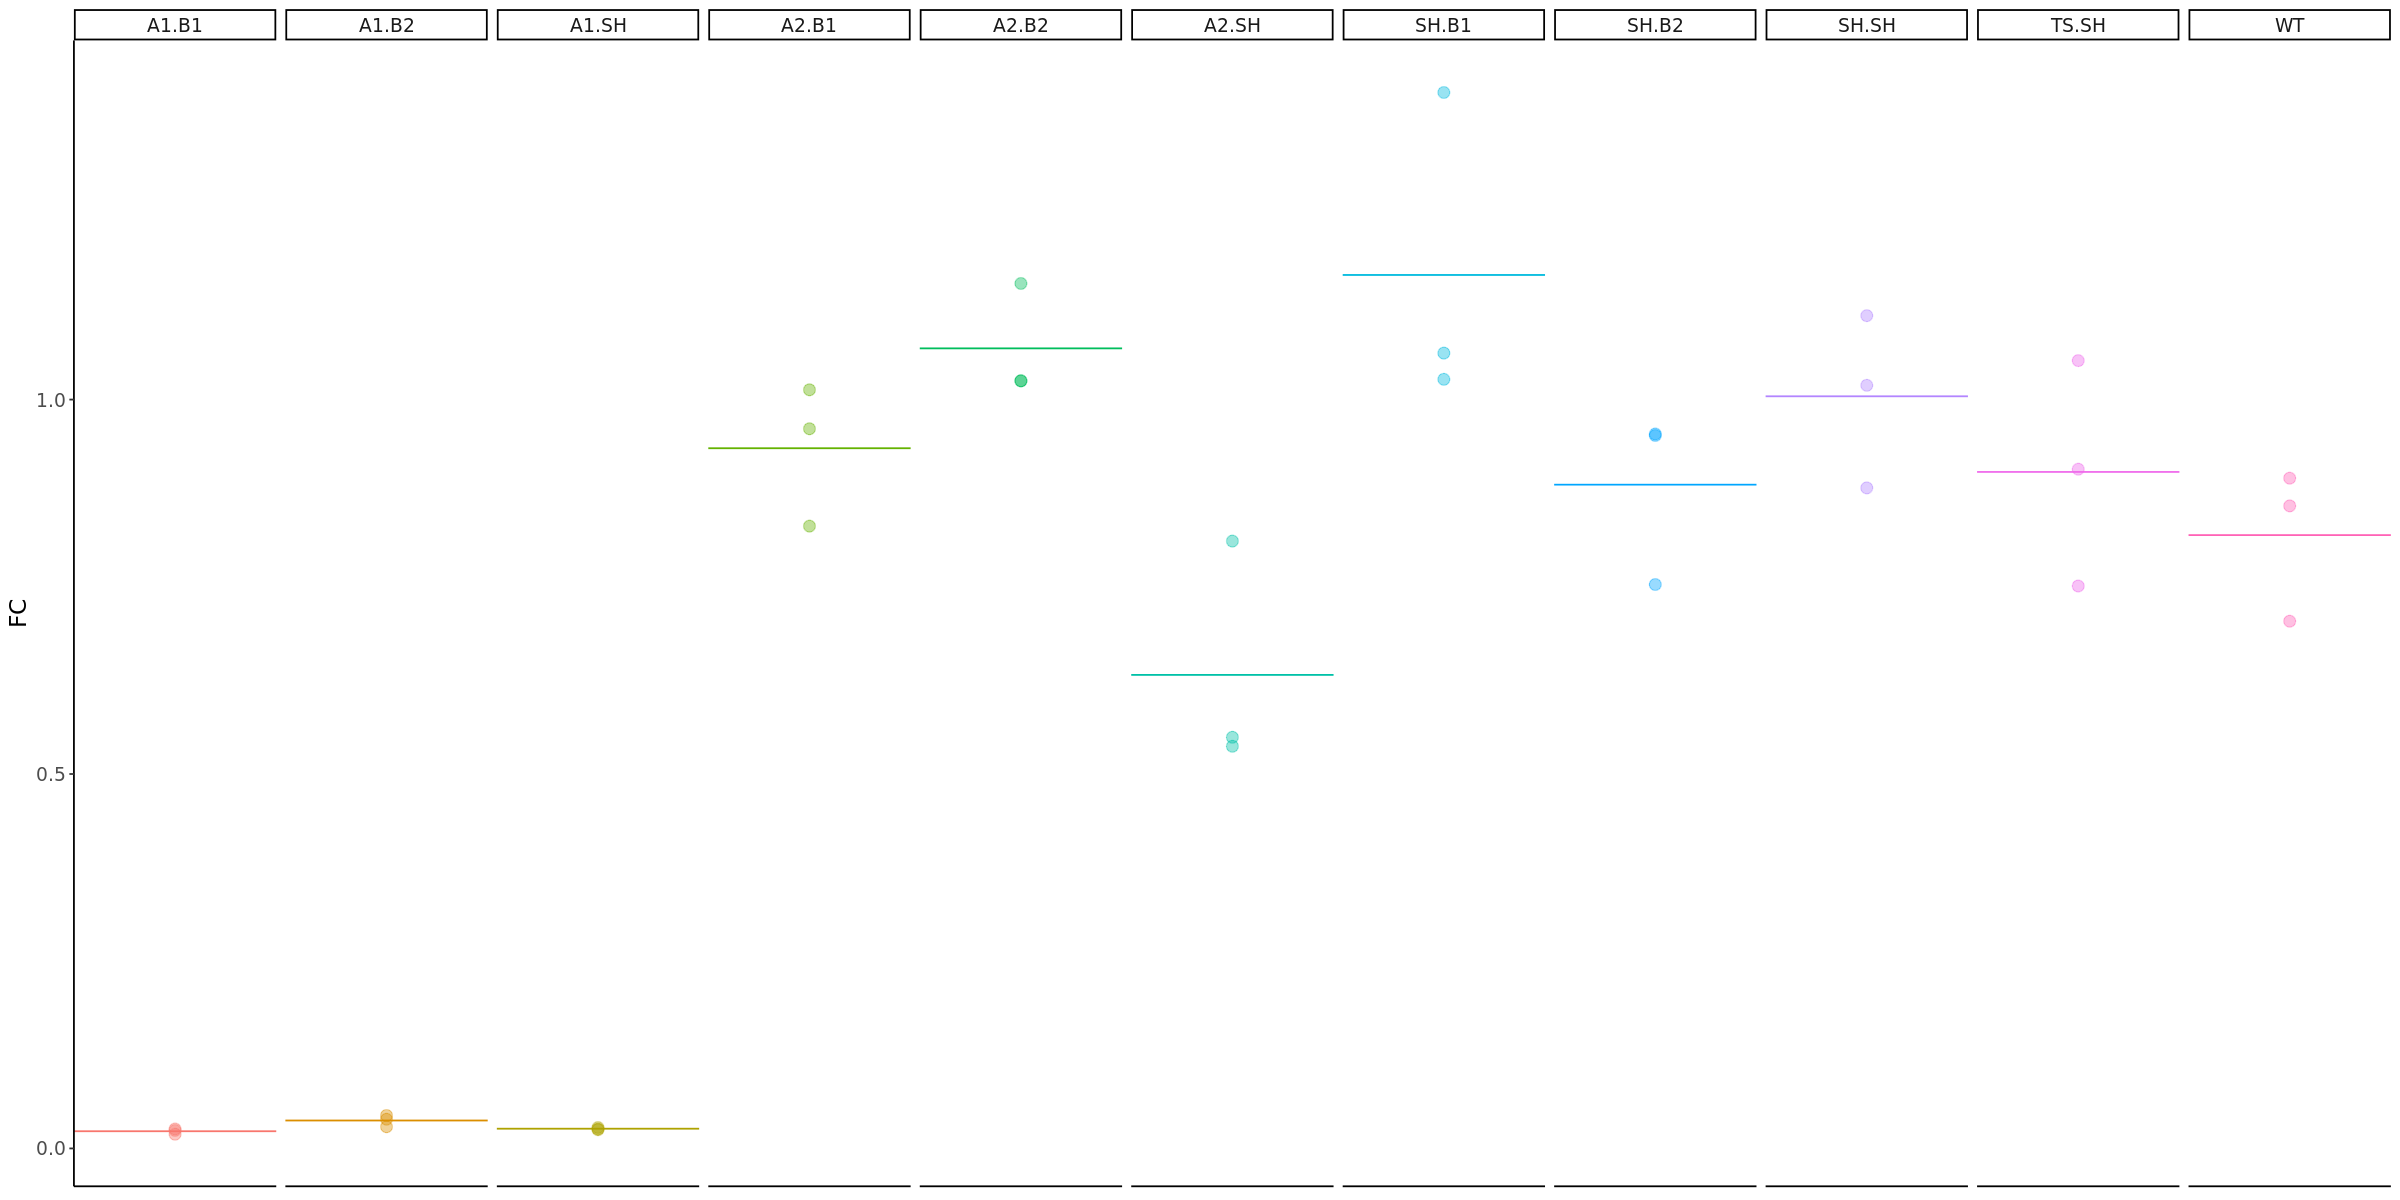

In [15]:
ggplot(plotdf %>% filter(sample != "mean"), 
       aes(x = vector, y = FC,
          color = vector)) + 
                 geom_point(size = 3, alpha = 0.4) +
                theme_classic() + theme(text = element_text(size = 14),
                                       legend.position = "none", 
                                        axis.ticks.x = element_blank(),
                                       axis.text.x = element_blank(),
                                       axis.title.x = element_blank()) +
geom_hline(data=  plotdf%>% filter(sample == "mean"), 
           aes(yintercept = FC, col=vector)) +
facet_grid(~vector, scales="free_x")

In [16]:
png("/iblm/netapp/data1/jezhou/crisprQTL/placeholder_experimental_plot.png",
   res = 300, units = "in", width = 10, height = 4)

print(
ggplot(plotdf %>% filter(sample != "mean"), 
       aes(x = vector, y = FC,
          color = vector)) + 
                 geom_point(size = 3, alpha = 0.4) +
                theme_classic() + theme(text = element_text(size = 14),
                                       legend.position = "none", 
                                        axis.ticks.x = element_blank(),
                                       axis.text.x = element_blank(),
                                       axis.title.x = element_blank()) +
geom_hline(data=  plotdf%>% filter(sample == "mean"), 
           aes(yintercept = FC, col=vector)) +
facet_grid(~vector, scales="free_x")
)

dev.off()

png 
  2

In [17]:
png("/iblm/netapp/data1/jezhou/crisprQTL/placeholder_experimental_plot_t-test.png",
   res = 300, units = "in", width = 10, height = 4)

print(
ggplot(plotdf %>% filter(sample != "mean"), 
       aes(x = vector, y = FC,
          color = vector)) + 
                 geom_point(size = 3, alpha = 0.4) +
                theme_classic() + 
            theme(text = element_text(size = 14),
                 legend.position = "none") +
            geom_errorbar(stat = "summary", fun = "mean",
                  width=0.6,aes(ymax=..y..,ymin=..y..)) +
stat_compare_means(comparisons = my_comparisons,
                  method = "t.test") + theme(legend.position = "none")
)

dev.off()

png 
  2

In [18]:
pdf("/iblm/netapp/data1/jezhou/crisprQTL/placeholder_experimental_plot_t-test.pdf",
    width = 10, height = 4)

print(
ggplot(plotdf %>% filter(sample != "mean"), 
       aes(x = vector, y = FC,
          color = vector)) + 
                 geom_point(size = 3, alpha = 0.4) +
                theme_classic() + 
            theme(text = element_text(size = 14),
                 legend.position = "none") +
            geom_errorbar(stat = "summary", fun = "mean",
                  width=0.6,aes(ymax=..y..,ymin=..y..)) +
stat_compare_means(comparisons = my_comparisons,
                  method = "t.test") + theme(legend.position = "none")
)

dev.off()

png 
  2